In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [11]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

In [12]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

In [13]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [14]:
Network = MODELS['vgg16']

In [16]:
?Network

In [17]:
model = Network(weights="imagenet")

In [25]:
def load_and_predict(image_name):
    image = load_img(image_name, target_size = inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess(image)
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

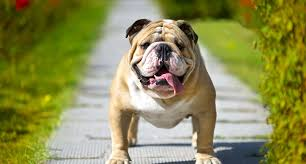

In [23]:
from IPython.display import Image
image_name='bulldog.jpg'
Image(filename=image_name)

In [24]:
load_and_predict(image_name)

1. bull_mastiff: 47.14%
2. Great_Dane: 42.22%
3. German_shepherd: 2.35%
4. bloodhound: 1.43%
5. malinois: 1.37%
